Create Dataset class

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.io import read_image

class Birds270Dataset(Dataset):
    def __init__(self, dataset_dir, set_type="train", transform=None, target_transform=None):
        csv_table = pd.read_csv(os.path.join(dataset_dir, "birds.csv"))
        self.img_data = csv_table[csv_table["data set"]==set_type]
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_data)

    def __getitem__(self, idx):
        filepaths_col = self.img_data.columns.get_loc("filepaths")
        labels_col = self.img_data.columns.get_loc("labels")
        img_path = os.path.join(self.dataset_dir, self.img_data.iat[idx, filepaths_col])
        image = read_image(img_path)
        label = self.img_data.iat[idx, labels_col]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [2]:
dataset_dir = "../data/birds270"
train_dataset = Birds270Dataset(dataset_dir, set_type="train")
test_dataset = Birds270Dataset(dataset_dir, set_type="test")

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

The code loads first batch and displays the first picture from the batch

Feature batch shape: torch.Size([64, 3, 224, 224])


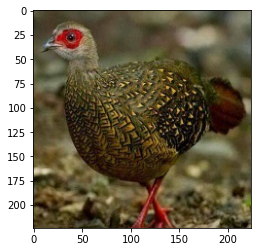

Label: SWINHOES PHEASANT


In [4]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}") #nie działa
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")